# Introduction : 

**Twitter has become an important communication channel in times of emergency.**

**The challenge is to build a machine learning model that accurately predicts whether a given tweet is about a real disaster or not. This problem is significant because Twitter has become a vital platform for real-time communication, including during emergencies. Agencies and organizations can benefit from automatic monitoring of such tweets for efficient and effective disaster response. However, distinguishing between tweets that are genuinely reporting a disaster and those that are metaphorical or unrelated is challenging for a machine due to the nuances in human language.**

**Natural Language Processing (NLP) is a field at the intersection of computer science, artificial intelligence, and linguistics. It involves building systems that can understand and interpret human language in a way that is valuable. Typical applications include translating texts, sentiment analysis, and, as in this case, text classification.**

# Loading the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data

In [26]:
import pandas as pd

train_data = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_data = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [55]:
print(train_data.head())
print(train_data.info())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target                                       cleaned_text  text_len  \
0       1  our deeds are the reason of this earthquake ma...        69   
1       1              forest fire near la ronge sask canada        38   
2       1  all residents asked to shelter in place are be...       133   
3       1  people receive wildfires evacuation orders in ...        65   
4       1  just got sent this photo from ruby alaska as s...        88   

   word_count  
0          13  
1           7  
2          22  
3           8  
4          1

In [56]:
print(test_data.head())
print(test_data.info())

   id keyword location                                               text  \
0   0     NaN      NaN                 Just happened a terrible car crash   
1   2     NaN      NaN  Heard about #earthquake is different cities, s...   
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...   
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires   
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan   

                                        cleaned_text  text_len  word_count  
0                 just happened a terrible car crash        34           6  
1  heard about earthquake is different cities sta...        64           9  
2  there is a forest fire at spot pond geese are ...        96          19  
3              apocalypse lighting spokane wildfires        40           4  
4         typhoon soudelor kills in china and taiwan        45           8  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
D

# Basic EDA: Exploring distributions and missing values

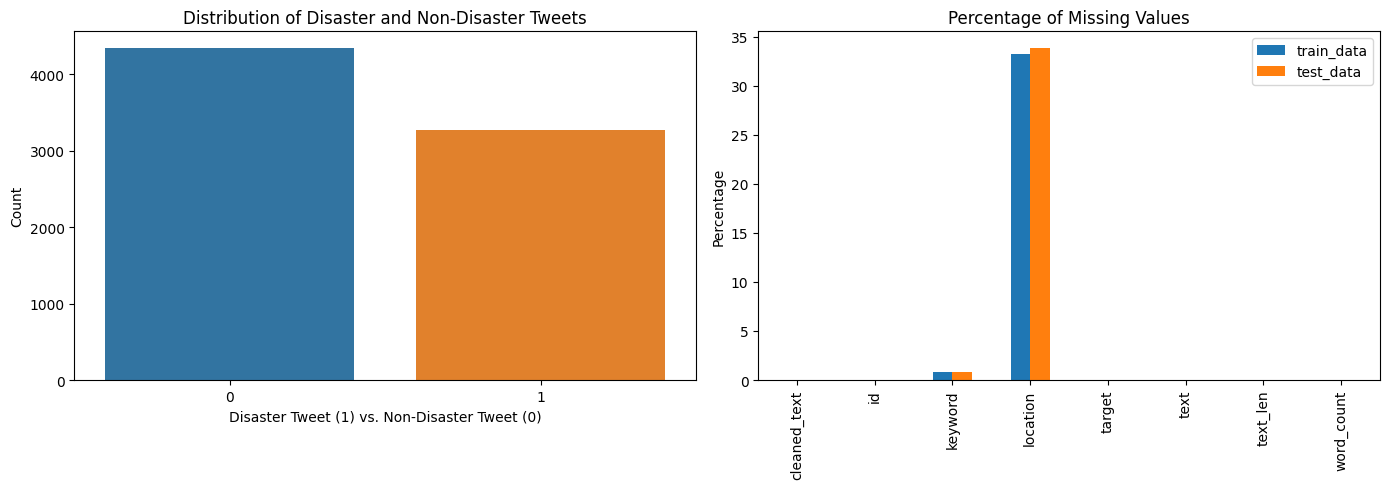

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(x='target', data=train_data, ax=ax[0])
ax[0].set_title('Distribution of Disaster and Non-Disaster Tweets')
ax[0].set_xlabel('Disaster Tweet (1) vs. Non-Disaster Tweet (0)')
ax[0].set_ylabel('Count')

missing_train = train_data.isnull().sum() / len(train_data) * 100
missing_test = test_data.isnull().sum() / len(test_data) * 100

missing_df = pd.DataFrame({'train_data': missing_train, 'test_data': missing_test})
missing_df.plot(kind='bar', ax=ax[1])
ax[1].set_title('Percentage of Missing Values')
ax[1].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

# Visualizing the text characteristics

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

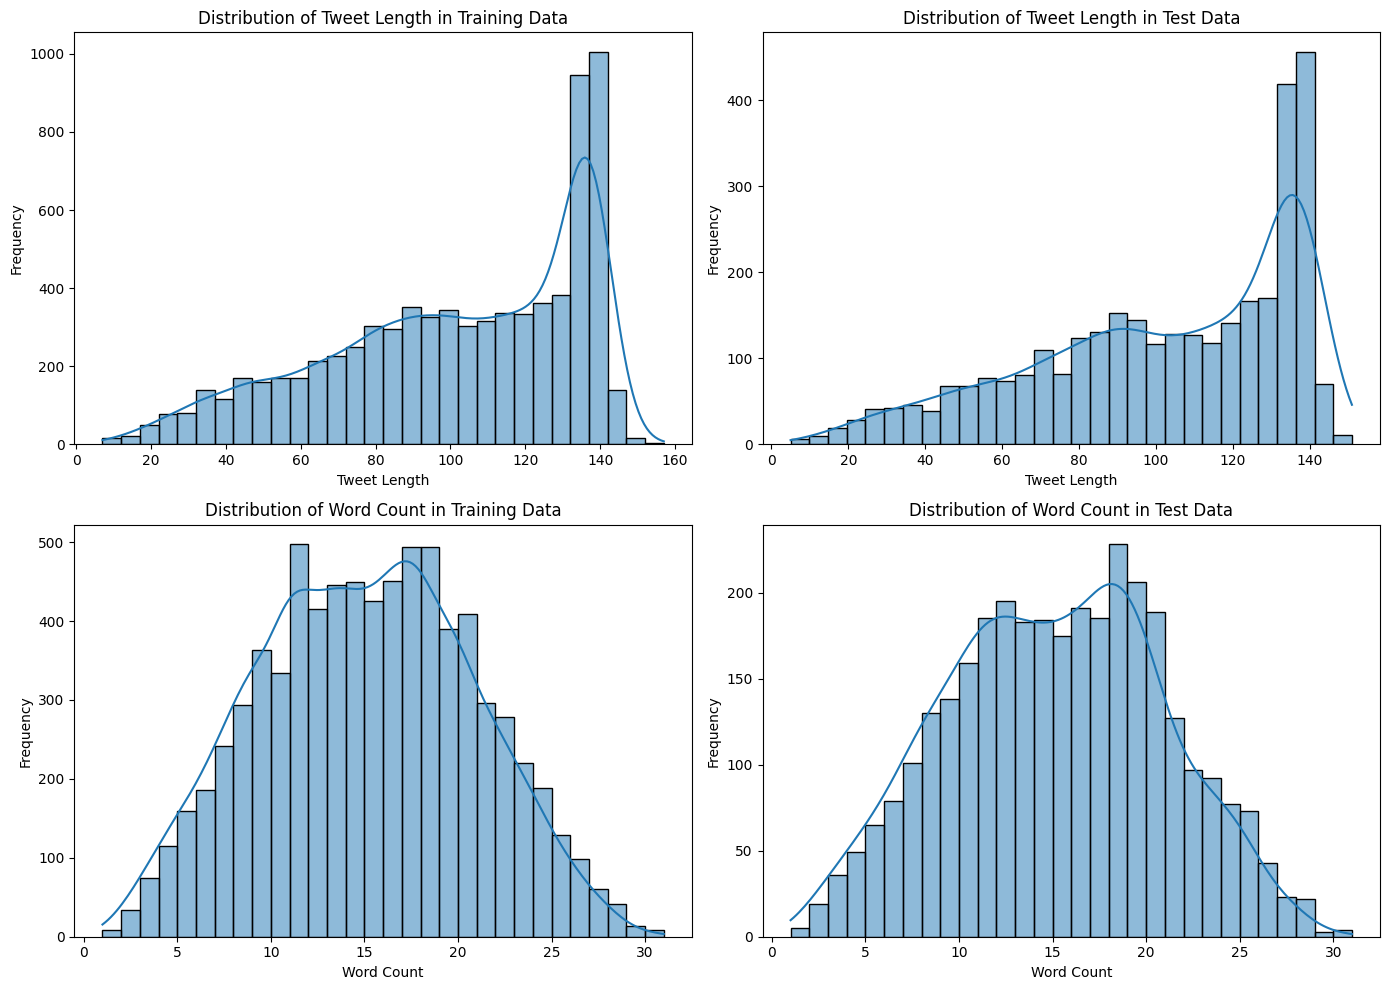

In [51]:
# length of each tweet
train_data['text_len'] = train_data['text'].apply(len)
test_data['text_len'] = test_data['text'].apply(len)

# word count of each tweet
train_data['word_count'] = train_data['text'].apply(lambda x: len(x.split()))
test_data['word_count'] = test_data['text'].apply(lambda x: len(x.split()))

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(train_data['text_len'], bins=30, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Tweet Length in Training Data')
ax[0, 0].set_xlabel('Tweet Length')
ax[0, 0].set_ylabel('Frequency')

sns.histplot(test_data['text_len'], bins=30, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Tweet Length in Test Data')
ax[0, 1].set_xlabel('Tweet Length')
ax[0, 1].set_ylabel('Frequency')

sns.histplot(train_data['word_count'], bins=30, kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Word Count in Training Data')
ax[1, 0].set_xlabel('Word Count')
ax[1, 0].set_ylabel('Frequency')

sns.histplot(test_data['word_count'], bins=30, kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of Word Count in Test Data')
ax[1, 1].set_xlabel('Word Count')
ax[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Tweet Length Distribution**
**Both training and test data show similar distributions in terms of tweet length. The majority of tweets are between 100 and 140 characters long, reflecting typical usage patterns on Twitter. This uniformity between training and test sets is favorable as it suggests that models trained on the training set should generalize well to the test set.**

**Word Count Distribution**
**The word count distributions also appear similar between the training and test datasets. Most tweets contain between 10 and 20 words, indicating concise messages typical of Twitter.**

# Text Cleaning and Preprocessing

In [57]:
def clean_text_modified(text):
    # Remove URLs, HTML tags, special characters, convert to lowercase
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    # tokenization
    words = text.split()
    return ' '.join(words)

train_data['cleaned_text'] = train_data['text'].apply(clean_text_modified)
test_data['cleaned_text'] = test_data['text'].apply(clean_text_modified)

train_data[['text', 'cleaned_text']].head()

,text,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this earthquake ma...
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation orders in ...
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska as s...


# Vectorizing the Text Data

**To prepare the cleaned text for modeling, we'll transform it into numerical form using TF-IDF (Term Frequency-Inverse Document Frequency). TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents.**

**This is done by multiplying two metrics:**

**Term Frequency (TF), which measures how frequently a term occurs in a document and Inverse Document Frequency (IDF), which measures how important a term is (less important if it's common across many documents).**

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['cleaned_text'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['cleaned_text'])

# For this text classification task, we'll consider two types of models to compare their performance: Logistic Regression & Recurrent Neural Network (RNN) with LSTM

# Logistic Regression: This is a baseline model for many text classification tasks because of its simplicity and effectiveness in high-dimensional spaces like those created by TF-IDF vectorization.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_tfidf, train_data['target'])
y_train_pred = logistic_model.predict(X_train_tfidf)
train_f1_score = f1_score(train_data['target'], y_train_pred)
print(train_f1_score)

0.8331952956766605


# The Logistic Regression model has been trained, and the initial evaluation on the training data resulted in an F1 score of approximately 0.833. This is a strong performance, indicating that the model is able to effectively classify tweets as disaster or non-disaster based on the textual content.

# Recurrent Neural Network (RNN) with LSTM: LSTM (Long Short-Term Memory) models are very effective for sequence prediction problems like text classification because they can capture long-term dependencies in sequence data.

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

# Parameters
max_words = 5000 
max_len = 50 

# Tokenization and sequence padding
tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(train_data['cleaned_text'])
sequences_train = tokenizer.texts_to_sequences(train_data['cleaned_text'])
sequences_test = tokenizer.texts_to_sequences(test_data['cleaned_text'])

X_train_seq = pad_sequences(sequences_train, maxlen=max_len)
X_test_seq = pad_sequences(sequences_test, maxlen=max_len)
y_train = np.array(train_data['target'])

# LSTM model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=50),
    SpatialDropout1D(0.2),
    LSTM(50, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
# LSTM Model
history = model.fit(X_train_seq, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=1)

model.summary()

Epoch 1/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.6025 - loss: 0.6579 - val_accuracy: 0.7900 - val_loss: 0.4719
Epoch 2/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8300 - loss: 0.4059 - val_accuracy: 0.8058 - val_loss: 0.4382
Epoch 3/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8716 - loss: 0.3308 - val_accuracy: 0.7874 - val_loss: 0.4572
Epoch 4/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.8936 - loss: 0.2837 - val_accuracy: 0.7874 - val_loss: 0.4789
Epoch 5/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9051 - loss: 0.2535 - val_accuracy: 0.7730 - val_loss: 0.5251


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ (None, 50, 50)         │       250,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ (None, 50, 50)         │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 810,755 (3.09 MB)

 Trainable params: 270,251 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 540,504 (2.06 MB)

**Model Training: The model went through 5 epochs of training, showing a steady decrease in training loss and an increase in validation accuracy. This is a good sign that the model is learning from the data.**

# Adding some improvements : 

**Adjusted the learning rate**

**Add early stopping to prevent ovefitting**

**Increaed outputdimension of Embedding layer and LSTM units**

**Training the model wth more epochs and early stopping to prevent overfitting**

In [41]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# learning rate
adam = Adam(learning_rate=0.001)

# LSTM Model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=100),  
    SpatialDropout1D(0.2),
    LSTM(100, dropout=0.2, recurrent_dropout=0.2),  
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# LSTM Model
history = model.fit(X_train_seq, y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=1, callbacks=[early_stopping])

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.6309 - loss: 0.6420 - val_accuracy: 0.7913 - val_loss: 0.4458
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8349 - loss: 0.3903 - val_accuracy: 0.7913 - val_loss: 0.4358
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.8694 - loss: 0.3175 - val_accuracy: 0.7887 - val_loss: 0.4621
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9008 - loss: 0.2556 - val_accuracy: 0.7677 - val_loss: 0.5049
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.9155 - loss: 0.2300 - val_accuracy: 0.7756 - val_loss: 0.5686


# Observations post improvements 

**Accuracy Improvement: The accuracy on the training set improved significantly, reaching approximately 90% by the end of training.**

**Validation Accuracy: The validation accuracy appears to peak at the second epoch and then starts to decrease slightly. This could be a sign that the model is beginning to overfit to the training data after the second epoch.**

**Early Stopping: Early stopping did not halt the training early, suggesting that overfitting wasn't significant enough to trigger the callback within the patience set (which is 3 epochs). However, given the trend in validation loss, it's a useful callback to have.**

**Training and Validation Loss: The training loss decreased steadily, which is good. The validation loss decreased initially but then started to increase again, further suggesting the onset of overfitting.**

**The model has improved in terms of training accuracy, but the slight decrease in validation accuracy suggests that it may be starting to memorize the training data rather than learning general patterns.**

In [44]:
from sklearn.metrics import f1_score

train_predictions = model.predict(X_train_seq)
train_predictions_binary = (train_predictions > 0.5).astype(int).reshape(-1)

# F1 score
train_f1_score = f1_score(y_train, train_predictions_binary)

print('F1 Score on the training data:', train_f1_score)

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
F1 Score on the training data: 0.905732484076433


# Choosing to go ahead with LSTM as the F1 score is higher than LSTM but doing some more hyperparameter tuning to impeove the model. 


In [46]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.regularizers import l2

# learning rate
adam = Adam(learning_rate=0.001)

# added regularization and a bidirectional layer
model = Sequential([
    Embedding(input_dim=max_words, output_dim=50),  
    SpatialDropout1D(0.3),  # Increased dropout
    Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3, kernel_regularizer=l2(0.001))), 
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)

# New LSTM Model
history = model.fit(X_train_seq, y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=1, callbacks=[early_stopping, reduce_lr])


Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.5803 - loss: 0.7786 - val_accuracy: 0.7743 - val_loss: 0.5129 - learning_rate: 0.0010
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.8051 - loss: 0.4737 - val_accuracy: 0.7979 - val_loss: 0.4675 - learning_rate: 0.0010
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.8448 - loss: 0.3888 - val_accuracy: 0.7966 - val_loss: 0.4571 - learning_rate: 0.0010
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - accuracy: 0.8684 - loss: 0.3407 - val_accuracy: 0.7940 - val_loss: 0.4606 - learning_rate: 0.0010
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.8948 - loss: 0.2905 - val_accuracy: 0.7743 - val_loss: 0.4884 - learning_rate: 0.0010
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9061 - loss: 0.2700 - val_accuracy: 0.7743 - val_loss: 0.4948 - learning_rate: 1.0000e-04


**Accuracy: The training accuracy has improved, reaching just over 90% by the end of the training.**

**Validation Accuracy: The validation accuracy appears stable around 77-79%. This suggests that while the model is learning from the training data, it may be reaching its performance limit on the validation data.**

# Applying the model to test data 

In [47]:
test_data['cleaned_text'] = test_data['text'].apply(clean_text_modified)

sequences_test = tokenizer.texts_to_sequences(test_data['cleaned_text'])
X_test_seq = pad_sequences(sequences_test, maxlen=max_len)

test_predictions = model.predict(X_test_seq)
test_predictions_binary = (test_predictions > 0.5).astype(int).reshape(-1)

102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


# Creating the submission file

In [48]:
submission = pd.DataFrame({
    'id': test_data['id'],
    'target': test_predictions_binary
})

submission.to_csv('submission_lstm.csv', index=False)

# Kaggle Score

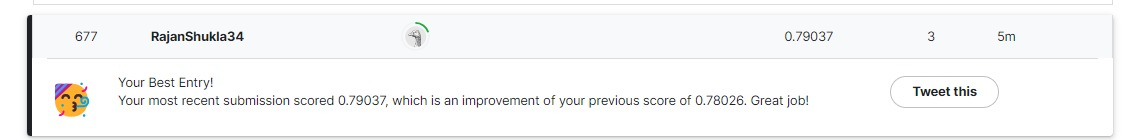

# Conclusions

**Logistic Regression proved effective as a baseline model with high-dimensional sparse data.**

**LSTM models, especially with regularization and dropout, captured sequential patterns in the text well.**

**Apply more sophisticated text preprocessing, including lemmatization, named entity recognition, and potentially exploring syntactical parsing.**

**Experimenting with different architectures like CNNs for text classification or advanced RNN structures can prove useful.**

**Exploring ensemble methods to leverage the strengths of multiple models.**

**Utilize larger datasets for training or augment the data using NLP techniques to provide the models with more examples to learn from.**